---
## Problem A - Basics of programming (16 points)

Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.

| Symbol| Value |  
| :-----| ----: |
| I| 1 |  
| V| 5 |  
| X| 10 |  
| L| 50 |  
| C| 100 |  
| D| 500 |  
| M| 1000 |  

For example, 2 is written as II in Roman numeral, just two ones added together. 12 is written as XII, which is simply X + II. The number 27 is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. 

Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used: 

I can be placed before V (5) and X (10) to make 4 and 9.  
X can be placed before L (50) and C (100) to make 40 and 90.  
C can be placed before D (500) and M (1000) to make 400 and 900. 
Given a roman numeral, convert it to an integer. 

In [25]:
class Solution:
    def romanToInt(self, s: str) -> int:
        """
        Convert the given Roman numeral string to an integer.

        Parameters:
            s (str): The Roman numeral string to be converted.

        Returns:
            int: The integer value of the Roman numeral.

        Examples:
            >>> solution = Solution()
            >>> solution.romanToInt("III")
            3
            >>> solution.romanToInt("LVIII")
            58
            >>> solution.romanToInt("MCMXCIV")
            1994
        """
        ### BEGIN SOLUTION
        m = {
            'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000
        }

        result = 0
        s_len = len(s)

        for i in range(s_len):
            if i < len(s) - 1 and m[s[i]] < m[s[i + 1]]:
                result -= m[s[i]]
            else:
                result += m[s[i]]

        return result
        ### END SOLUTION

Some test cases are provided below.

In [26]:
"""Check that romanToInt returns the correct output for several inputs"""
assert Solution().romanToInt("III") == 3
assert Solution().romanToInt("LVIII") == 58
assert Solution().romanToInt("MCMXCIV") == 1994
### BEGIN HIDDEN TESTS
assert Solution().romanToInt("MCD") == 1400
assert Solution().romanToInt("MXVIII") == 1018
assert Solution().romanToInt("MDCCLXXVIII") == 1778
assert Solution().romanToInt("MCDXLIV") == 1444
assert Solution().romanToInt("MMMDCCCLXXXVII") == 3887
assert Solution().romanToInt("MMMDCCXXIV") == 3724
assert Solution().romanToInt("DCCLXXIV") == 774
### END HIDDEN TESTS

---

## Problem B - Recursion (16 points)

You are given the root of a full binary tree with the following properties:

- Leaf nodes have either the value 0 or 1, where 0 represents False and 1 represents True.
- Non-leaf nodes have either the value 2 or 3, where 2 represents the boolean OR and 3 represents the boolean AND.

The evaluation of a node is as follows:

- If the node is a leaf node, the evaluation is the value of the node, i.e. True or False.
- Otherwise, evaluate the node's two children and apply the boolean operation of its value with the children's evaluations.
Return the boolean result of evaluating the root node.

A full binary tree is a binary tree where each node has either 0 or 2 children.

A leaf node is a node that has zero children.

#### Example 1:  
Input: root = `TreeNode(2, TreeNode(1), TreeNode(3, TreeNode(0), TreeNode(1)))`  
Output: true  

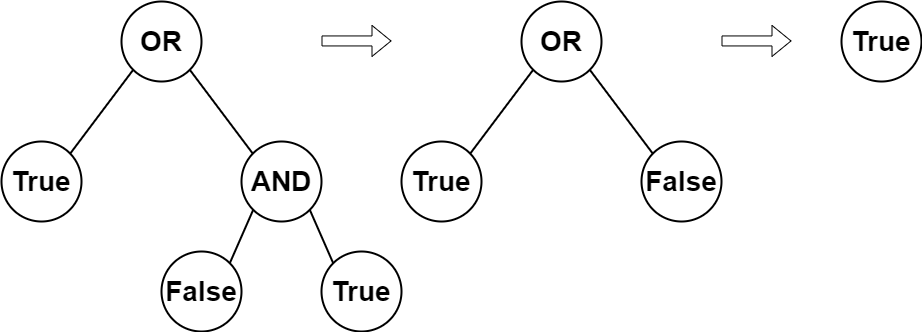  
Explanation: The above diagram illustrates the evaluation process.  
The AND node evaluates to False AND True = False.  
The OR node evaluates to True OR False = True.  
The root node evaluates to True, so we return true.  

#### Example 2:
Input: root = `TreeNode(0)`   
Output: false  
Explanation: The root node is a leaf node and it evaluates to false, so we return false.  

In [ ]:
from typing import Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:
    def evaluateTree(self, root: Optional[TreeNode]) -> bool:
        """
        Evaluate a full binary tree representing boolean expressions and return the result.

        A full binary tree consists of nodes with values representing boolean operations and leaf nodes representing boolean values.
        For non-leaf nodes:
            - Value 2 represents boolean OR operation.
            - Value 3 represents boolean AND operation.
        For leaf nodes:
            - Value 0 represents False.
            - Value 1 represents True.

        Parameters:
            root (Optional[TreeNode]): The root of the full binary tree.

        Returns:
            bool: The boolean result of evaluating the root node.

        Examples:
            >>> solution = Solution()

            # Example 1:
            >>> root1 = TreeNode(2, TreeNode(1), TreeNode(3, TreeNode(0), TreeNode(1)))
            >>> solution.evaluateTree(root1)
            True

            # Example 2:
            >>> root2 = TreeNode(0)
            >>> solution.evaluateTree(root2)
            False
        """
        
        ### BEGIN SOLUTION
        if root.val == 0 or root.val == 1:
            return bool(root.val)

        result = (self.evaluateTree(root.left), self.evaluateTree(root.right))
        return any(result) if root.val == 2 else all(result) 
        ### END SOLUTION

Some test cases are provided below.

In [28]:
"""Check that evaluateTree returns the correct output for several inputs"""
assert Solution().evaluateTree(TreeNode(2, TreeNode(1), TreeNode(3, TreeNode(0), TreeNode(1)))) == True
assert Solution().evaluateTree(TreeNode(0)) == False
### BEGIN HIDDEN TESTS
assert Solution().evaluateTree(TreeNode(1)) == True

root = TreeNode(2, 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0), 
                           TreeNode(0)), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(0),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == False

root = TreeNode(2, 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0), 
                           TreeNode(0)), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(3, 
                  TreeNode(2, 
                           TreeNode(1),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(0),
                           TreeNode(1))))

assert Solution().evaluateTree(root) == True

root = TreeNode(2, 
         TreeNode(3, 
                  TreeNode(2, 
                           TreeNode(1),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(0),
                           TreeNode(1))),
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0), 
                           TreeNode(0)), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == True

root = TreeNode(2, 
         TreeNode(2, 
                  TreeNode(3, 
                           TreeNode(1), 
                           TreeNode(2, 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0), 
                                                   TreeNode(0)), 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0))), 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0)), 
                                           TreeNode(2,
                                                   TreeNode(0),
                                                   TreeNode(1))))), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(3, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(0),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == True

root = TreeNode(2, 
         TreeNode(2, 
                  TreeNode(3, 
                           TreeNode(0), 
                           TreeNode(2, 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0), 
                                                   TreeNode(0)), 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0))), 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0)), 
                                           TreeNode(2,
                                                   TreeNode(0),
                                                   TreeNode(1))))), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(3, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(0),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == False

root = TreeNode(2, 
         TreeNode(2, 
                  TreeNode(3, 
                           TreeNode(0), 
                           TreeNode(2, 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0), 
                                                   TreeNode(0)), 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0))), 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0)), 
                                           TreeNode(2,
                                                   TreeNode(0),
                                                   TreeNode(0))))), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(1),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == True

root = TreeNode(2, 
         TreeNode(3, 
                  TreeNode(3, 
                           TreeNode(1), 
                           TreeNode(2, 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0), 
                                                   TreeNode(0)), 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0))), 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0)), 
                                           TreeNode(2,
                                                   TreeNode(0),
                                                   TreeNode(1))))), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(1))), 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(0),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == True

root = TreeNode(3, 
         TreeNode(2, 
                  TreeNode(3, 
                           TreeNode(0), 
                           TreeNode(2, 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0), 
                                                   TreeNode(0)), 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0))), 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0)), 
                                           TreeNode(2,
                                                   TreeNode(0),
                                                   TreeNode(0))))), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(1),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == False

root = TreeNode(3, 
         TreeNode(2, 
                  TreeNode(3, 
                           TreeNode(1), 
                           TreeNode(2, 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(1), 
                                                   TreeNode(0)), 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0))), 
                                   TreeNode(2, 
                                           TreeNode(2, 
                                                   TreeNode(0),
                                                   TreeNode(0)), 
                                           TreeNode(2,
                                                   TreeNode(0),
                                                   TreeNode(0))))), 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0))), 
         TreeNode(2, 
                  TreeNode(2, 
                           TreeNode(0),
                           TreeNode(0)), 
                  TreeNode(2,
                           TreeNode(1),
                           TreeNode(0))))

assert Solution().evaluateTree(root) == True
### END HIDDEN TESTS

---

## Problem C - Depth-First Search (16 points)

Given the head of a singly linked list, reverse the list, and return the reversed list.

#### Example 1:
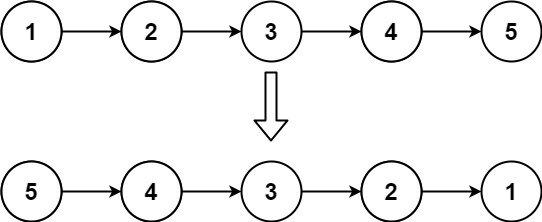  
Input: head = [1,2,3,4,5]  
Output: [5,4,3,2,1]  

#### Example 2:
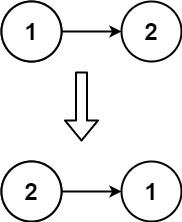  
Input: head = [1,2]  
Output: [2,1]  

#### Example 3:  
Input: head = []  
Output: []  

In [ ]:
from typing import Optional

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
    @classmethod
    def from_list(cls, values):
        head = ListNode()
        current = head
        for val in values:
            current.next = ListNode(val)
            current = current.next
        return head.next

    def to_list(self):
        values = []
        current = self
        while current:
            values.append(current.val)
            current = current.next
        return values
    
    def __eq__(self, other: 'ListNode') -> bool:
        return self.to_list() == other.to_list()        
          
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        """
        Reverse a singly linked list and return the reversed list.

        Parameters:
            head (Optional[ListNode]): The head of the original linked list.

        Returns:
            Optional[ListNode]: The head of the reversed linked list.

        Examples:
            >>> solution = Solution()

            # Example 1:
            >>> head1 = ListNode.from_list([1, 2, 3, 4, 5])
            >>> reversed_head1 = solution.reverseList(head1)
            >>> reversed_head1.to_list()
            [5, 4, 3, 2, 1]

            # Example 2:
            >>> head2 = ListNode.from_list([1, 2])
            >>> reversed_head2 = solution.reverseList(head2)
            >>> reversed_head2.to_list()
            [2, 1]

            # Example 3:
            >>> head3 = None
            >>> reversed_head3 = solution.reverseList(head3)
            >>> reversed_head3 is None
            True
        """
        
        ### BEGIN SOLUTION
        new_head = head

        if head and head.next:
            new_head = self.reverseList(head.next)
            head.next.next = head
            head.next = None

        return new_head
        ### END SOLUTION

Some test cases are provided below.

In [30]:
"""Check that reverseList returns the correct output for several inputs"""
assert Solution().reverseList(ListNode.from_list([1, 2, 3, 4, 5])) == ListNode.from_list([5, 4, 3, 2, 1])
assert Solution().reverseList(ListNode.from_list([1, 2])) == ListNode.from_list([2, 1])
assert Solution().reverseList(None) is None
### BEGIN HIDDEN TESTS
import random
from copy import deepcopy

lst = [random.randint(0,1000) for _ in range(1234)]
rev_lst = deepcopy(lst)
rev_lst.reverse()

assert Solution().reverseList(ListNode.from_list(lst)) == ListNode.from_list(rev_lst)
### END HIDDEN TESTS

---

## Problem D - Disjoint Set Union / BFS (10 points)

This problem could be solved using Disjoint Set Union (DSU) or Breadth-First Search (BFS).

There are n cities. Some of them are connected, while some are not. If city a is connected directly with city b, and city b is connected directly with city c, then city a is connected indirectly with city c.  

A province is a group of directly or indirectly connected cities and no other cities outside of the group.  

You are given an n x n matrix isConnected where isConnected[i][j] = 1 if the ith city and the jth city are directly connected, and isConnected[i][j] = 0 otherwise.  

Return the total number of provinces.  

#### Example 1:
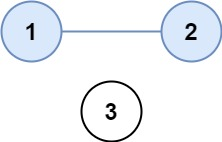  
Input: isConnected = [[1,1,0],[1,1,0],[0,0,1]]  
Output: 2  

#### Example 2:  
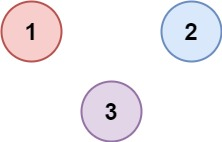  
Input: isConnected = [[1,0,0],[0,1,0],[0,0,1]]  
Output: 3  

In [31]:
from typing import List

class DisjointSetUnion:
    def __init__(self, n):
        self.parents = [i for i in range(n)]
        
    def find(self, x):
        if self.parents[x] == x:
            return x
        
        self.parents[x] = self.find(self.parents[x])
        return self.parents[x]
    
    def union(self, x, y):
        x_par, y_par = self.find(x), self.find(y)
        self.parents[x_par] = y_par

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        """
        Return the total number of provinces in a group of directly or indirectly connected cities.

        Parameters:
            isConnected (List[List[int]]): An n x n matrix where isConnected[i][j] = 1 if the ith city and the jth city are directly connected, and isConnected[i][j] = 0 otherwise.

        Returns:
            int: The total number of provinces.

        Examples:
            >>> solution = Solution()

            # Example 1:
            >>> isConnected1 = [[1,1,0],[1,1,0],[0,0,1]]
            >>> solution.findCircleNum(isConnected1)
            2

            # Example 2:
            >>> isConnected2 = [[1,0,0],[0,1,0],[0,0,1]]
            >>> solution.findCircleNum(isConnected2)
            3
        """
        
        ### BEGIN SOLUTION
        m = len(isConnected)
        dsu = DisjointSetUnion(m)

        for i in range(m):
            for j in range(i+1, m):
                if isConnected[i][j]: 
                    dsu.union(i, j)

        return len(set(dsu.find(i) for i in range(m)))
        ### END SOLUTION

Some test cases are provided below.

In [32]:
"""Check that findCircleNum returns the correct output for several inputs"""
assert Solution().findCircleNum([[1,1,0],[1,1,0],[0,0,1]]) == 2
assert Solution().findCircleNum([[1,0,0],[0,1,0],[0,0,1]]) == 3
### BEGIN HIDDEN TESTS
from typing import List

def generate_isConnected(n, num_ones):
    # 確保 num_ones 不超過最大可能的連通數量
    num_ones = min(num_ones, n * (n - 1) // 2)

    # 生成初始 isConnected 矩陣，全部為 0
    isConnected = [[0] * n for _ in range(n)]

    # 隨機選擇 num_ones 個位置，將其設為 1
    indices = [(i, j) for i in range(n) for j in range(i+1, n)]
    chosen_indices = random.sample(indices, num_ones)
    for i, j in chosen_indices:
        isConnected[i][j] = isConnected[j][i] = 1

    return isConnected
        
def generate_answer(isConnected: List[List[int]]) -> int:
    class DisjointSetUnion:
        def __init__(self, n):
            self.parents = [i for i in range(n)]
            
        def find(self, x):
            if self.parents[x] == x:
                return x
            
            self.parents[x] = self.find(self.parents[x])
            return self.parents[x]
        
        def union(self, x, y):
            x_par, y_par = self.find(x), self.find(y)
            self.parents[x_par] = y_par
            
    m = len(isConnected)
    dsu = DisjointSetUnion(m)

    for i in range(m):
        for j in range(i+1, m):
            if isConnected[i][j]: 
                dsu.union(i, j)

    return len(set(dsu.find(i) for i in range(m)))

for i in range(20):
    x = generate_isConnected(100, 100)
    assert Solution().findCircleNum(x) == generate_answer(x)
### END HIDDEN TESTS

---

## Problem E - OOP methods, operator overloading (16 points)

Use the OOP concept to complete the "Matrix" class.  
In this problem, you are provided with a "Matrix" class that represents a two-dimensional array of numbers. 

The class has the following methods:
- `__init__`: Initialize the matrix with a given number of rows and columns.
- `__str__`: Return a string representation of the matrix.
- `__getitem__`: Return the value at the given row and column.
- `__setitem__`: Set the value at the given row and column.
- `__add__`: Add two matrices of the same dimensions.
- `__matmul__`: Multiply two matrices of compatible dimensions.
- `__mul__`: Multiply a matrix and a vector of the same number of columns.
- `zeros`: Create a new matrix of a given number of rows and columns, filled with zeros.
- `from_list`: Create a new matrix from a list of lists.

The `__init__`, `__str__`, `__getitem__`, `__setitem__`, `__add__` and `__matmul__` methods are the special methods in Python that allow us to overload operators.  

The following examples show the usage of these methods:  
```python
>> m = Matrix([[0, 1], [2, 3]], 2, 2)   # uses the __init__ method
>> print(m)       # implicitly uses the __str__ method to print the matrix
0.0      1.0     
2.0      3.0
>> print(m[0, 1]) # uses the __getitem__ method
1
>> m[0, 1] = 5    # uses the __setitem__ method
>> print(m)       # the value of m in row 0, col 1 now is 5
0.0      5.0     
2.0      3.0
```
In order to make the building of the matrix easier, the `from_list` method is provided to create a new matrix from a list of lists. The `zeros` method is also provided to create a new matrix of a given number of rows and columns, filled with zeros.
```python
>> print(Matrix.from_list([[0, 1], [2, 3]])) # uses the from_list method
0.0      1.0     
2.0      3.0   
>> print(Matrix.zeros(2, 2))                 # uses the zeros method
0.0      0.0     
0.0      0.0   
```

Now, two of the methods require implementation.
- `__add__`: Add two matrices of the same dimensions.
- `__matmul__`: Multiply two matrices of compatible dimensions.

```python
>> m1 = Matrix.from_list([[1, 2], [3, 4]])
>> m2 = Matrix.from_list([[5, 6], [7, 8]])
>> print(m1 + m2) # uses the __add__ method to add m1 and m2
6.0      8.0     
10.0     12.0 
>> print(m1 @ m2) # uses the __matmul__ method to multiply m1 and m2
19.0     22.0    
43.0     50.0  
```

Note that the __add__ overloads the `+` operator, and the __matmul__ overloads the `@` operator.

Recap: The Matrix Operations (from Prof. Jwo-Yuh Wu's Linear Algebra)

- Matrix Addition  
Let **A** = $[a_{ij}]$ and **B** = $[b_{ij}]$ be two $m \times n$ matrices s.t **A**, **B** $\in \mathbb{R}^{m \times n}$.  
Then the sum **A+B** is again an $m \times n$ matrix, where   
$c_{ij} = a_{ij} + b_{ij}$ for all $i,j$.
- Matrix Multiplication(Product)  
Let **A** = $[a_{ij}] \in \mathbb{R}^{p \times q}$ and **B** = $[b_{ij}] \in \mathbb{R}^{m \times n}$, then the product **AB** is defined if and only if $q = m$.    
Then the product **C = AB** is an $p \times n$ matrix, where  
$c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}$ for $i \in [1, p],j \in [1, n]$.  

Remember that in programming, the index of the first element of a matrix starts from 0 instead of 1.

You are required to complete the implementation of the "Matrix" class, and your code should pass the test cases provided.  
**DO NOT MODIFY THE CLASS METHODS OTHER THAN THE REQUIRED TWO OPERATIONS.**

In [ ]:
from __future__ import annotations
from typing import List, Tuple
from copy import deepcopy

class Matrix:
    def __init__(self, arr: List[List[float]] = [], num_rows: int = 0, num_cols: int = 0) -> None:
        assert (num_rows == 0 and num_cols == 0) or (num_rows > 0 and num_cols > 0), "Invalid dimensions"
        if arr:
            assert len(arr) == num_rows, "Invalid number of rows"
            for row in arr:
                assert len(row) == num_cols, "Invalid number of columns"
                
        self.matrix = arr
        self.num_rows = num_rows
        self.num_cols = num_cols
    
    def __str__(self) -> str:
        return '\n'.join([' '.join([f'{cell:<8.1f}' for cell in row]) for row in self.matrix])
    
    def __repr__(self) -> str:
        return self.__str__()
    
    def __getitem__(self, key: Tuple[int, int]) -> float:
        return self.matrix[key[0]][key[1]]
    
    def __setitem__(self, key: Tuple[int, int], value: float) -> None:
        self.matrix[key[0]][key[1]] = value    
    
    def __add__(self, other):
        # Check if the matrices have the same dimensions
        assert self.num_rows == other.num_rows and self.num_cols == other.num_cols, "Matrices must have the same dimensions"
        
        ### BEGIN SOLUTION
        result = Matrix.zeros(self.num_rows, self.num_cols)
        for i in range(self.num_rows):
            for j in range(self.num_cols):
                result.matrix[i][j] = self.matrix[i][j] + other.matrix[i][j]
                
        return result
        ### END SOLUTION
    
    def __matmul__(self, other):
        # Check if the matrices have compatible dimensions for multiplication
        assert self.num_cols == other.num_rows, "Matrices must have compatible dimensions for multiplication"
        
        ### BEGIN SOLUTION
        result = Matrix.zeros(self.num_rows, other.num_cols)
        for i in range(self.num_rows):
            for j in range(other.num_cols):
                for k in range(self.num_cols):
                    result.matrix[i][j] += self.matrix[i][k] * other.matrix[k][j]
        
        return result
        ### END SOLUTION
    
    def __mul__(self, other: Vector) -> Vector:
        result = deepcopy(other)
        result.matrix = (self @ other).matrix
        return result
        
    @staticmethod
    def zeros(num_rows: int, num_cols: int) -> Matrix:
        result = Matrix()
        result.matrix = [[0 for j in range(num_cols)] for i in range(num_rows)]
        result.num_rows = num_rows
        result.num_cols = num_cols
        
        return result    
    
    @staticmethod
    def from_list(arr: List[List[float]]) -> Matrix:
        x = Matrix()
        x.matrix = [list(row) for row in arr]
        x.num_rows = len(arr)
        x.num_cols = len(arr[0]) if arr else 0
        
        for i in range(x.num_rows):
            if len(arr[i])!= x.num_cols:
                raise ValueError("Array must be a square matrix")
            
        return x
    
class Vector(Matrix):
    ... # or pass 

Example usage & test cases are provided below.

In [ ]:
"""Check that the Matrix class can be initialized with a given number of rows and columns, and that the matrix can be printed using str()"""
# The ":=" operator is a shorthand for assigning a variable and then returning it,
# which has the same behavior to the "=" operator in C++.
assert (x := Matrix.from_list([[14,43,31],[53,13,64]])).matrix == [[14,43,31],[53,13,64]]
assert (y := Matrix.from_list([[43,23],[53,34],[50,61]])).matrix == [[43,23],[53,34],[50,61]]
assert (z := x @ y).matrix == [[4431,3675],[6168,5565]]
print(z)
print()

assert (x := Matrix.from_list([[14,43,31],[53,13,64]])).matrix == [[14,43,31],[53,13,64]]
assert (y := Matrix.from_list([[43,23,53],[34,50,61]])).matrix == [[43,23,53],[34,50,61]]
assert (z := x + y).matrix == [[57,66,84],[87,63,125]]
print(z)
print()
### BEGIN HIDDEN TESTS
def from_list(arr: List[List[float]]) -> Matrix:
    x = Matrix()
    x.matrix = [list(row) for row in arr]
    x.num_rows = len(arr)
    x.num_cols = len(arr[0]) if arr else 0
    
    for i in range(x.num_rows):
        if len(arr[i])!= x.num_cols:
            raise ValueError("Array must be a square matrix")
        
    return x

def zeros(num_rows: int, num_cols: int) -> Matrix:
    result = Matrix()
    result.matrix = [[0 for j in range(num_cols)] for i in range(num_rows)]
    result.num_rows = num_rows
    result.num_cols = num_cols

    return result 

# Test for matrix addition
dim = (random.randint(5, 10), random.randint(5, 10))
rand_list1 = [[random.randint(1, 50) for _ in range(dim[1])] for _ in range(dim[0])]
rand_list2 = [[random.randint(1, 50) for _ in range(dim[1])] for _ in range(dim[0])]

rand_list_sum = [[sum(x) for x in zip(row1, row2)] for row1, row2 in zip(rand_list1, rand_list2)]
rand_sum = Matrix.from_list(rand_list1) + Matrix.from_list(rand_list2)
rand_sum = rand_sum.matrix

assert all(x == y for x, y in zip(rand_list_sum, rand_sum))

# Test for matrix multiplication
dim_i, dim_j, dim_k = [random.randint(5, 10)] * 3
rand_list1 = [[random.randint(1, 50) for _ in range(dim_k)] for _ in range(dim_i)]
rand_list2 = [[random.randint(1, 50) for _ in range(dim_j)] for _ in range(dim_k)]

m1, m2 = from_list(rand_list1), from_list(rand_list2)

expected = zeros(dim_i, dim_k)
for i in range(dim_i):
    for j in range(dim_j):
        for k in range(dim_k):
            expected.matrix[i][j] += rand_list1[i][k] * rand_list2[k][j]

expected = expected.matrix
result = (m1 @ m2).matrix

assert all(x == y for x, y in zip(expected, result))
### END HIDDEN TESTS

---

## Problem F - OOP inheretance (16 points)

You should complete `Matrix` class first.
Use the OOP concept to complete the following "Vector" class.  
In this problem, you are provided with a "Vector" class that inherited from the "Matrix" class.  

The class has the following methods:
- `__init__`: Initialize the vector with a given number of dimensions.
- `__getitem__`: Return the value at the given index.
- `__setitem__`: Set the value at the given index.

Since the dimensionality of a vector is 1, the "Vector" class needs some modifications to the `__getitem__` and `__setitem__` methods.  
All the other methods are inherited from the "Matrix" class.

```python
>> x = Vector([1, 2, 3])
>> print(x)
1.0     
2.0     
3.0  
>> x[0] = 100 # to make this operator work, the inherited __setitem__ is overridden
>> print(x)
100.0   
2.0     
3.0 
```

Now, one of the methods require implementation(the `__setitem__` is already implemented).
- `__getitem__`: Return the value at the given index.

```python
>> x = Vector([1, 2, 3])
>> print(x[0]) # override the inherited __getitem__ to make this operator work
1
```

You are required to complete the implementation of the "Vector" class, and your code should pass the test cases provided.  
**DO NOT MODIFY THE CLASS METHODS OTHER THAN THE REQUIRED OPERATION.**  

**Hint**:  
Reference to the `__setitem__` method provided below, and use the same trick to implement the `__getitem__` method.  
Note that you can use the `super` keyword to call the parent class's method.  

You may reference to the type hint in the `Matrix` class.  

The "Vector" implemented a "column" vector.  
In other words, the "Vector" should have only **one** column and (may) have **multiple** rows.  
Check your indexing first if you got an `IndexError`.

In [ ]:
from __future__ import annotations
from typing import List

class Vector(Matrix):
    def __init__(self, arr: List[float]):
        super().__init__([[x] for x in arr], len(arr), 1)
    
    def __getitem__(self, index: int) -> float:
        ### BEGIN SOLUTION
        return super().__getitem__((index, 0))
        ### END SOLUTION
    
    def __setitem__(self, index: int, value: float) -> None:
        super().__setitem__((index, 0), value)

Example usage & test cases are provided below.

In [ ]:
y = Matrix.from_list([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
assert y[1, 2] == 6 # The __getitem__ method in the Matrix class is called

x = Vector([1, 2, 3])
assert x[0] == 1    # The __getitem__ method in the Vector class is called

z = y * x           # Calls the __mul__ method in the Matrix class, and returns a Vector object
assert z[1] == 32   # If you complete the __getitem__ method in the Vector class, this should work!!
### BEGIN HIDDEN TESTS
import random
for i in range(5):
    test_z = Vector([random.randint(1, 10) for _ in range(4)])
    idx = random.randint(0, 3)
    assert test_z.matrix[idx][0] == test_z[idx]
### END HIDDEN TESTS